# **Part 5: Insights on Categorical factors**
---

In this section, we will be analysing categorical factors that can influence the success of a movie and determine if it is an infuential factor <br>



In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from IPython.display import display
sb.set() 

In [3]:
cast_filtered = pd.read_pickle('cast_filtered.pkl')
prod_filtered = pd.read_pickle('prod_filtered.pkl')
dir_filtered = pd.read_pickle('dir_filtered.pkl')
genres_filtered = pd.read_pickle('genres_filtered.pkl')


#### *cast*

In [4]:
cast_filtered

,popularity,profit,cast
0,32.985763,1.363529e+09,Chris Pratt
1,28.419936,2.284364e+08,Tom Hardy
1,28.419936,2.284364e+08,Charlize Theron
2,13.112507,1.852382e+08,Kate Winslet
2,13.112507,1.852382e+08,Miles Teller
...,...,...,...
1279,2.508235,7.639876e+07,Sean Connery
1280,0.960984,-1.400000e+07,Kurt Russell
1282,1.549139,1.547778e+08,Roger Moore
1283,1.910465,1.301957e+08,Sean Connery


#### *production_companies*

In [5]:
prod_filtered

,popularity,profit,production_companies
0,32.985763,1.363529e+09,Amblin Entertainment
0,32.985763,1.363529e+09,Legendary Pictures
0,32.985763,1.363529e+09,Dentsu
1,28.419936,2.284364e+08,Village Roadshow Pictures
2,13.112507,1.852382e+08,Summit Entertainment
...,...,...,...
1283,1.910465,1.301957e+08,Metro-Goldwyn-Mayer (MGM)
1284,1.778746,7.497449e+07,Eon Productions
1284,1.778746,7.497449e+07,Metro-Goldwyn-Mayer (MGM)
1284,1.778746,7.497449e+07,Danjaq


#### *director*

In [6]:
dir_filtered

,popularity,profit,director
1,28.419936,2.284364e+08,George Miller
2,13.112507,1.852382e+08,Robert Schwentke
3,11.173104,1.868178e+09,J.J. Abrams
4,9.335014,1.316249e+09,James Wan
5,9.110700,3.979505e+08,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
...,...,...,...
1280,0.960984,-1.400000e+07,John Carpenter
1281,2.010733,4.333061e+08,William Friedkin
1282,1.549139,1.547778e+08,Guy Hamilton
1283,1.910465,1.301957e+08,Terence Young


#### *genres*

In [7]:
genres_filtered

,popularity,profit,genres
0,32.985763,1.363529e+09,Action
0,32.985763,1.363529e+09,Adventure
0,32.985763,1.363529e+09,Science Fiction
0,32.985763,1.363529e+09,Thriller
1,28.419936,2.284364e+08,Action
...,...,...,...
1284,1.778746,7.497449e+07,Action
1284,1.778746,7.497449e+07,Thriller
1285,1.198849,6.970000e+07,Horror
1285,1.198849,6.970000e+07,Thriller


### Mean of *popularity* and *profit* for each variable

#### *cast*

In [8]:
mean_profit_by_cast = cast_filtered.groupby("cast")["profit"].mean()
mean_popularity_by_cast = cast_filtered.groupby("cast")["popularity"].mean()
display(mean_profit_by_cast, mean_popularity_by_cast)

cast
Aaron Eckhart        1.768422e+08
Abbie Cornish        4.404650e+07
Abigail Breslin      5.270388e+07
Adam Sandler         1.015443e+08
Al Pacino            1.228691e+08
                         ...     
Winona Ryder         6.675413e+07
Woody Harrelson      2.287871e+08
Zach Galifianakis    1.469285e+08
Zoe Saldana          6.349191e+08
Zooey Deschanel      3.853914e+07
Name: profit, Length: 321, dtype: float64

cast
Aaron Eckhart        2.018311
Abbie Cornish        1.379922
Abigail Breslin      1.463021
Adam Sandler         1.677745
Al Pacino            2.152814
                       ...   
Winona Ryder         1.689443
Woody Harrelson      2.796703
Zach Galifianakis    1.534692
Zoe Saldana          5.319022
Zooey Deschanel      1.341595
Name: popularity, Length: 321, dtype: float64

In [9]:
top_10_cast_profit = mean_profit_by_cast.sort_values(ascending=False).head(10)
top_10_cast_popularity = mean_popularity_by_cast.sort_values(ascending=False).head(10)


# Print the top 10 casts
print(top_10_cast_profit)
print("\n")
print(top_10_cast_popularity)

cast
Rupert Grint          7.103065e+08
Ian McKellen          6.528630e+08
Zoe Saldana           6.349191e+08
Sigourney Weaver      6.097290e+08
Orlando Bloom         6.038917e+08
Emma Watson           5.806230e+08
Daniel Radcliffe      5.641885e+08
Michelle Rodriguez    5.511121e+08
Paul Walker           5.437462e+08
Liam Hemsworth        4.915336e+08
Name: profit, dtype: float64


cast
Chris Pratt       7.603355
Tom Hardy         7.363336
Ian McKellen      5.955087
Michael Caine     5.647003
Casey Affleck     5.538732
Orlando Bloom     5.353645
Zoe Saldana       5.319022
Liam Hemsworth    5.106294
Rupert Grint      5.082768
Miles Teller      4.737795
Name: popularity, dtype: float64


<AxesSubplot:title={'center':'Top 10 Casts by Popularity'}, ylabel='cast'>

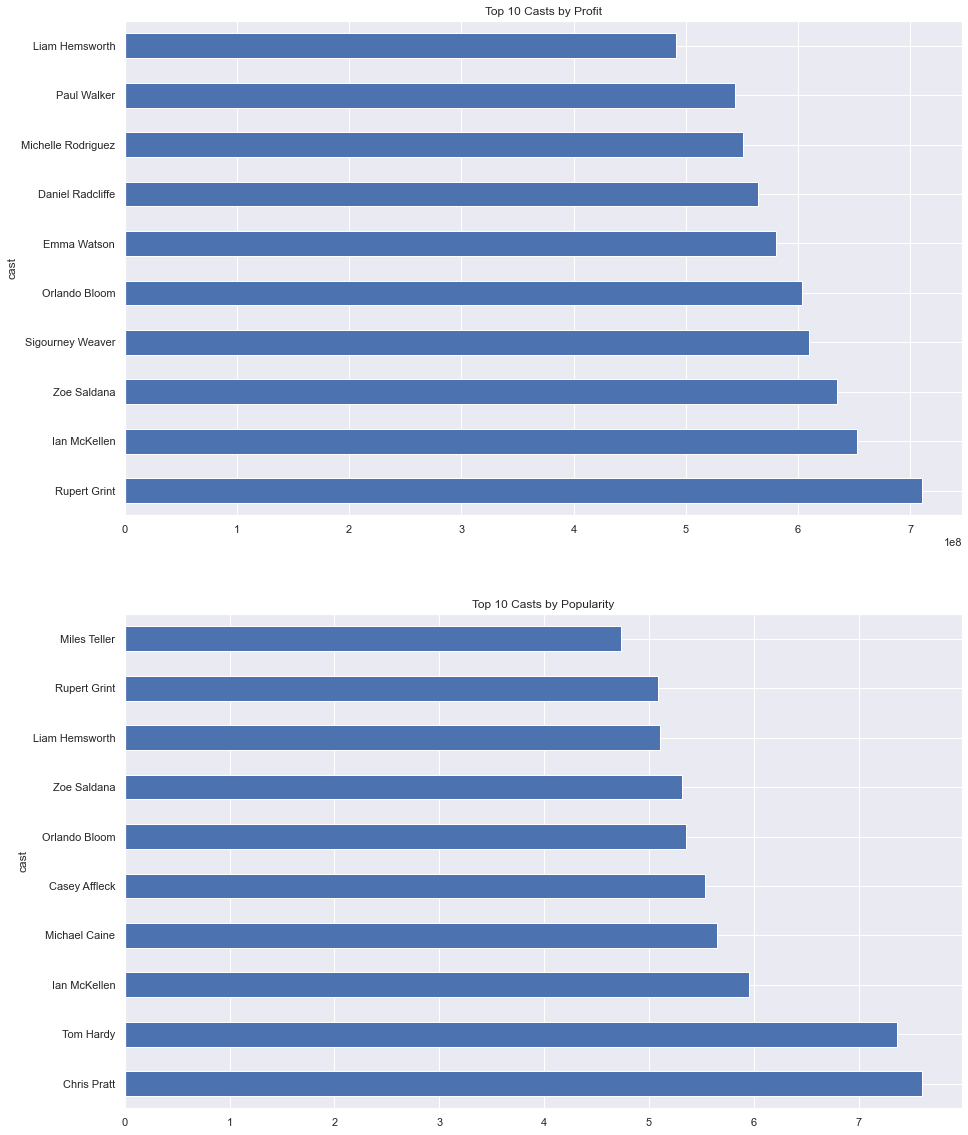

In [44]:
f, axes = plt.subplots(2, 1, figsize=(15, 20))
top_10_cast_profit.plot(kind='barh', title='Top 10 Casts by Profit', ax=axes[0])
top_10_cast_popularity.plot(kind='barh', title='Top 10 Casts by Popularity', ax=axes[1])

#### *production_companies*

In [10]:
mean_profit_by_prod = prod_filtered.groupby("production_companies")["profit"].mean()
mean_popularity_by_prod = prod_filtered.groupby("production_companies")["popularity"].mean()
display(mean_profit_by_prod, mean_popularity_by_prod)

production_companies
1492 Pictures                        2.580206e+08
20th Century Fox                     9.376905e+07
21 Laps Entertainment                1.021079e+08
3 Arts Entertainment                 6.062205e+07
Affirm Films                         3.315747e+07
                                         ...     
Warner Bros. Animation               9.523564e+07
Warner Independent Pictures (WIP)    1.202267e+07
Weed Road Pictures                   1.637005e+08
WingNut Films                        5.280403e+08
Working Title Films                  9.564426e+07
Name: profit, Length: 155, dtype: float64

production_companies
1492 Pictures                        2.648557
20th Century Fox                     1.527272
21 Laps Entertainment                1.343531
3 Arts Entertainment                 1.819087
Affirm Films                         0.492822
                                       ...   
Warner Bros. Animation               1.234895
Warner Independent Pictures (WIP)    0.688099
Weed Road Pictures                   1.439762
WingNut Films                        5.098463
Working Title Films                  1.562140
Name: popularity, Length: 155, dtype: float64

In [11]:
top_10_prod_profit = mean_profit_by_prod.sort_values(ascending=False).head(10)
top_10_prod_popularity = mean_popularity_by_prod.sort_values(ascending=False).head(10)


# Print the top 10 casts
print(top_10_prod_profit)
print("\n")
print(top_10_prod_popularity)

production_companies
Lucasfilm                  6.794342e+08
Heyday Films               6.235558e+08
Marvel Studios             6.072975e+08
Bad Robot                  5.541445e+08
WingNut Films              5.280403e+08
Syncopy                    5.002794e+08
Pixar Animation Studios    4.569506e+08
Blue Sky Studios           4.377500e+08
Ingenious Film Partners    3.910382e+08
Dentsu                     3.851518e+08
Name: profit, dtype: float64


production_companies
Syncopy                         8.760872
Marvel Studios                  7.205610
Dentsu                          5.404452
Lucasfilm                       5.224876
WingNut Films                   5.098463
Moving Picture Company (MPC)    4.850131
Legendary Pictures              4.758827
Heyday Films                    4.673604
TSG Entertainment               4.020649
Thunder Road Pictures           3.978390
Name: popularity, dtype: float64


<AxesSubplot:title={'center':'Top 10 Production Companies by Popularity'}, ylabel='production_companies'>

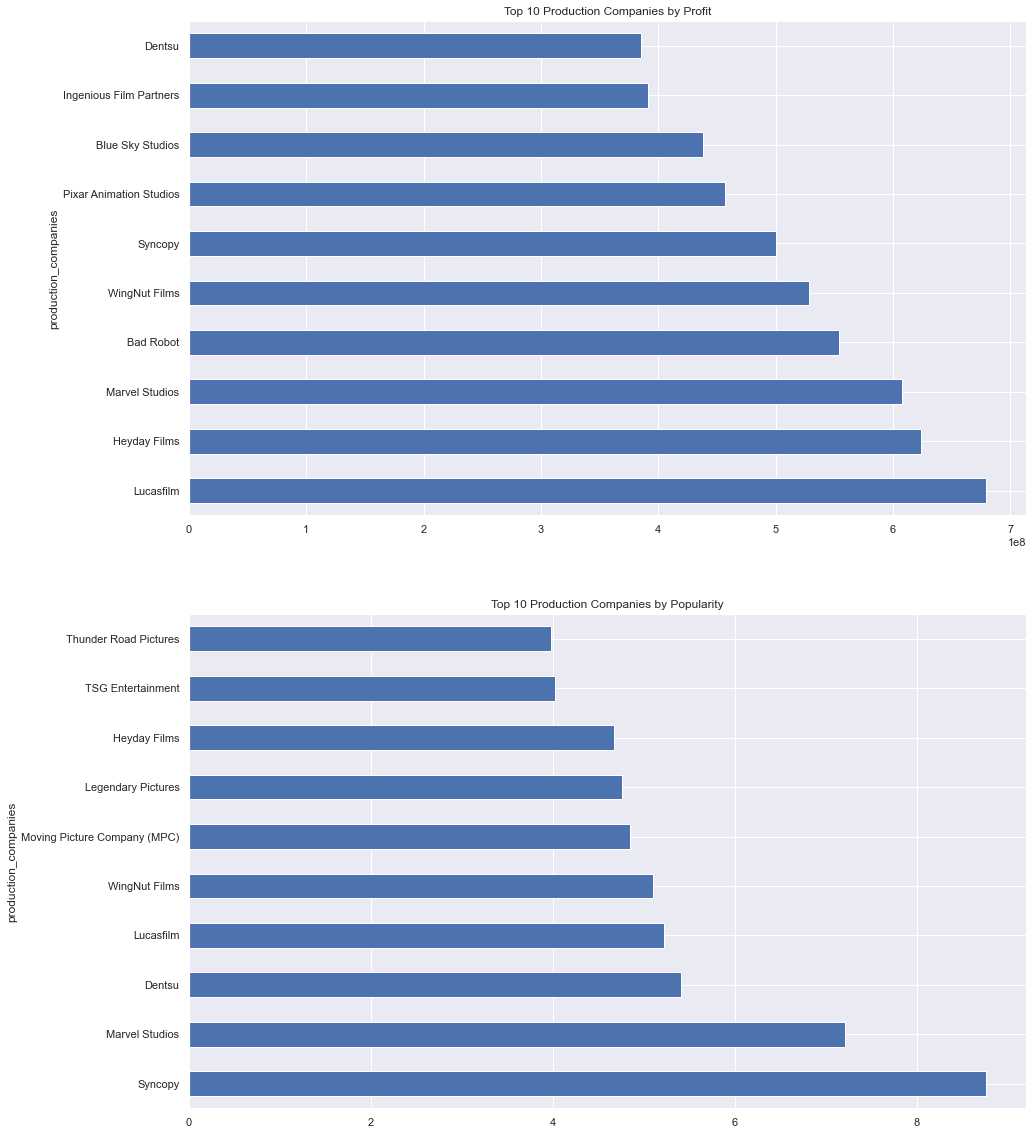

In [42]:
f, axes = plt.subplots(2, 1, figsize=(15, 20))
top_10_prod_profit.plot(kind='barh', title='Top 10 Production Companies by Profit', ax=axes[0])
top_10_prod_popularity.plot(kind='barh', title='Top 10 Production Companies by Popularity', ax=axes[1])

#### *director*

In [12]:
mean_profit_by_dir = dir_filtered.groupby("director")["profit"].mean()
mean_popularity_by_dir = dir_filtered.groupby("director")["popularity"].mean()
display(mean_profit_by_dir, mean_popularity_by_dir)

director
Aaron Seltzer                     3.476799e+07
Adam McKay                        8.874854e+07
Adam Shankman                     2.802564e+07
Alan Taylor                       2.976843e+08
Alejandro GonzÃ¡lez IÃ±Ã¡rritu    2.191892e+08
                                      ...     
Wes Anderson                      2.936709e+07
Wes Ball                          2.822884e+08
Will Gluck                        6.034506e+07
William Friedkin                  2.134856e+08
Zack Snyder                       1.875356e+08
Name: profit, Length: 299, dtype: float64

director
Aaron Seltzer                     0.834562
Adam McKay                        2.326714
Adam Shankman                     1.387662
Alan Taylor                       6.883129
Alejandro GonzÃ¡lez IÃ±Ã¡rritu    5.053031
                                    ...   
Wes Anderson                      1.743630
Wes Ball                          5.553082
Will Gluck                        1.750489
William Friedkin                  1.246551
Zack Snyder                       2.031628
Name: popularity, Length: 299, dtype: float64

In [13]:
top_10_dir_profit = mean_profit_by_dir.sort_values(ascending=False).head(10)
top_10_dir_popularity = mean_popularity_by_dir.sort_values(ascending=False).head(10)


# Print the top 10 casts
print(top_10_dir_profit)
print("\n")
print(top_10_dir_popularity)

director
Joss Whedon       1.212297e+09
James Cameron     1.066388e+09
David Yates       8.448239e+08
Pierre Coffin     8.173356e+08
J.J. Abrams       7.753747e+08
Chris Renaud      6.846379e+08
Sam Mendes        6.285107e+08
Lee Unkrich       6.191573e+08
Peter Jackson     6.072054e+08
Andrew Adamson    5.971240e+08
Name: profit, dtype: float64


director
George Miller        14.675428
Christopher Nolan     8.635610
Robert Schwentke      7.401188
James Gunn            7.377549
Alan Taylor           6.883129
Joe Russo             6.875857
Anthony Russo         6.875857
Joss Whedon           6.791347
Peter Jackson         5.625672
Wes Ball              5.553082
Name: popularity, dtype: float64


<AxesSubplot:title={'center':'Top 10 Directors by Popularity'}, ylabel='director'>

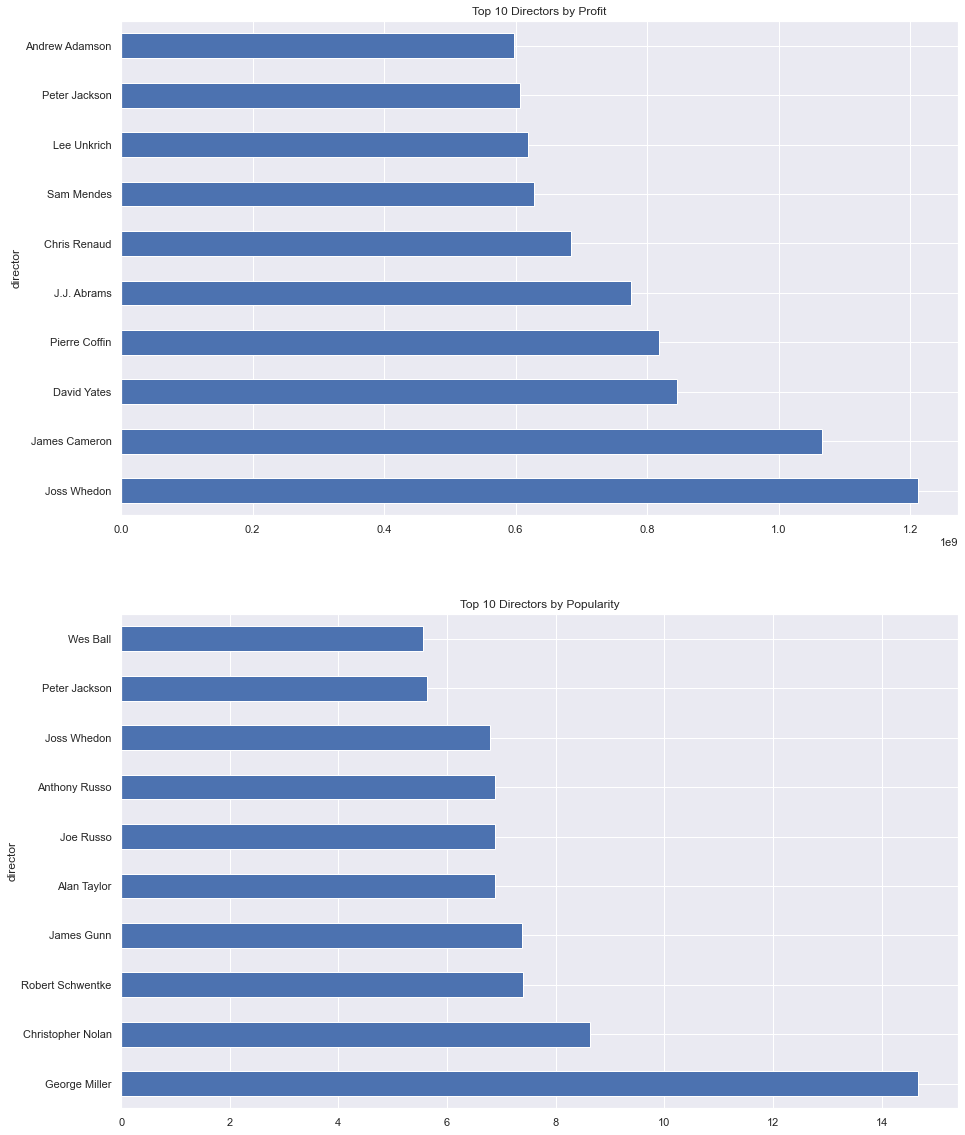

In [43]:
f, axes = plt.subplots(2, 1, figsize=(15, 20))
top_10_dir_profit.plot(kind='barh', title='Top 10 Directors by Profit', ax=axes[0])
top_10_dir_popularity.plot(kind='barh', title='Top 10 Directors by Popularity', ax=axes[1])


#### *genre*

In [15]:
mean_profit_by_genres = genres_filtered.groupby("genres")["profit"].mean().sort_values(ascending=False)
mean_popularity_by_genres = genres_filtered.groupby("genres")["popularity"].mean().sort_values(ascending=False)
display(mean_profit_by_genres, mean_popularity_by_genres)

genres
Fantasy            2.753663e+08
Adventure          2.748331e+08
Animation          2.532673e+08
Family             2.350913e+08
Science Fiction    1.986346e+08
Action             1.785419e+08
Comedy             1.014472e+08
War                9.909955e+07
Thriller           9.789353e+07
Mystery            9.589013e+07
Romance            8.407155e+07
Music              8.164122e+07
Crime              7.559482e+07
Drama              6.981669e+07
Horror             6.449803e+07
History            5.926379e+07
Western            4.745375e+07
Documentary        1.980633e+07
Name: profit, dtype: float64

genres
Science Fiction    3.067299
Adventure          3.017460
Fantasy            2.600988
Western            2.510376
Action             2.482394
Animation          2.068166
Family             2.012103
Thriller           1.953044
Mystery            1.827205
War                1.813071
Crime              1.563969
Drama              1.414404
Comedy             1.385712
Music              1.309767
Romance            1.280101
History            1.273964
Horror             1.168778
Documentary        0.363880
Name: popularity, dtype: float64

<AxesSubplot:xlabel='genres', ylabel='profit'>

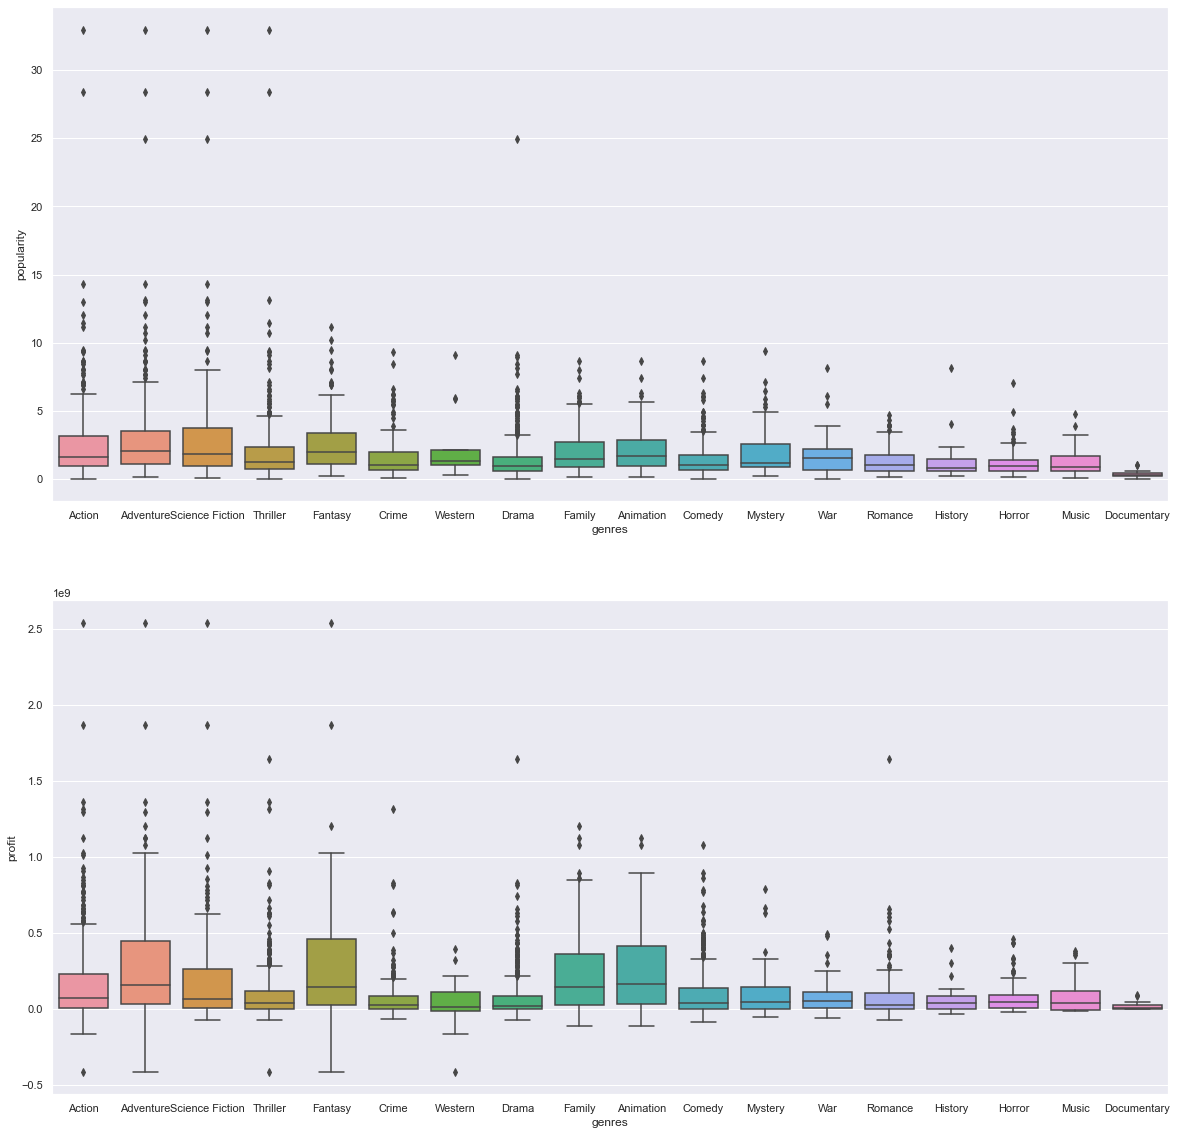

In [16]:
f, axes = plt.subplots(2, 1, figsize=(20, 20))

sb.boxplot(data=genres_filtered, x="genres", y="popularity", orient = 'v', ax = axes[0])
sb.boxplot(data=genres_filtered, x="genres", y="profit", orient = 'v', ax = axes[1])



---
## Analysing correlation between categorical factors and success factors

The code below shows the correlation between different categorical factors and success factors(profit and popularity).<br>

This is done through the use of one-hot encoding by coverting categorical data to numerical data.


### *cast*

In [18]:
# use one hot encoding to create binary indicator variables for the cast
cast_dummies = pd.get_dummies(cast_filtered['cast'])

cast_success = pd.concat([cast_dummies, cast_filtered], axis=1)

# drop the original 'cast' column since it is no longer needed
cast_data = cast_success.drop('cast', axis=1)
cast_popularity = cast_data.drop('profit', axis=1)
cast_profit = cast_data.drop('popularity', axis=1)

cast_profit = cast_profit.groupby(cast_profit.index).sum()
cast_popularity = cast_popularity.groupby(cast_popularity.index).sum()


In [19]:
corr_matrix_cast_profit = cast_profit.corr()
target_column = 'profit'
corr_cast_profit = corr_matrix_cast_profit[target_column]

# Sort the correlations in descending order
corr_cast_profit = corr_cast_profit.sort_values(ascending=False)

print(corr_cast_profit)

profit            1.000000
Orlando Bloom     0.259912
Rupert Grint      0.243882
Ian McKellen      0.221418
Emma Watson       0.221074
                    ...   
Paul Giamatti    -0.037661
Colin Farrell    -0.042037
Kurt Russell     -0.042403
Susan Sarandon   -0.044264
Julianne Moore   -0.045652
Name: profit, Length: 322, dtype: float64


In [20]:
corr_matrix_cast_pop = cast_popularity.corr()
target_column = 'popularity'
corr_cast_pop = corr_matrix_cast_pop[target_column]

# Sort the correlations in descending order
corr_cast_pop = corr_cast_pop.sort_values(ascending=False)

print(corr_cast_pop)

popularity          1.000000
Michael Caine       0.281095
Orlando Bloom       0.228840
Ian McKellen        0.203125
Casey Affleck       0.199023
                      ...   
Milla Jovovich     -0.036162
Roger Moore        -0.036238
Donald Pleasence   -0.036757
Susan Sarandon     -0.037712
Paul Giamatti      -0.038377
Name: popularity, Length: 322, dtype: float64


### *production_companies*

In [21]:
# use one hot encoding to create binary indicator variables for the cast
prod_dummies = pd.get_dummies(prod_filtered['production_companies'])

prod_success = pd.concat([prod_dummies, prod_filtered], axis=1)

# drop the original 'cast' column since it is no longer needed
prod_data = prod_success.drop('production_companies', axis=1)
prod_popularity = prod_data.drop('profit', axis=1)
prod_profit = prod_data.drop('popularity', axis=1)

prod_profit = prod_profit.groupby(prod_profit.index).sum()
prod_popularity = prod_popularity.groupby(prod_popularity.index).sum()


In [22]:
corr_matrix_prod_profit = prod_profit.corr()
target_column = 'profit'
corr_prod_profit = corr_matrix_prod_profit[target_column]

# Sort the correlations in descending order
corr_prod_profit = corr_prod_profit.sort_values(ascending=False)

print(corr_prod_profit)

profit                      1.000000
Syncopy                     0.223022
Heyday Films                0.221612
Dentsu                      0.189915
Amblin Entertainment        0.180829
                              ...   
Screen Gems                -0.046014
Morgan Creek Productions   -0.048024
BBC Films                  -0.048527
Dimension Films            -0.053268
Miramax Films              -0.070913
Name: profit, Length: 156, dtype: float64


In [23]:
corr_matrix_prod_pop = prod_popularity.corr()
target_column = 'popularity'
corr_prod_pop = corr_matrix_prod_pop[target_column]

# Sort the correlations in descending order
corr_prod_pop = corr_prod_pop.sort_values(ascending=False)

print(corr_prod_pop)

popularity            1.000000
Syncopy               0.379647
Legendary Pictures    0.300930
Dentsu                0.219249
Warner Bros.          0.154385
                        ...   
BBC Films            -0.039286
Lions Gate Films     -0.040814
UK Film Council      -0.041714
Dimension Films      -0.045426
Miramax Films        -0.059953
Name: popularity, Length: 156, dtype: float64


### *director*

In [24]:
# use one hot encoding to create binary indicator variables for the cast
dir_dummies = pd.get_dummies(dir_filtered['director'])

dir_success = pd.concat([dir_dummies, dir_filtered], axis=1)

# drop the original 'cast' column since it is no longer needed
dir_data = dir_success.drop('director', axis=1)
dir_popularity = dir_data.drop('profit', axis=1)
dir_profit = dir_data.drop('popularity', axis=1)

dir_profit = dir_profit.groupby(dir_profit.index).sum()
dir_popularity = dir_popularity.groupby(dir_popularity.index).sum()

In [25]:
corr_matrix_dir_profit = dir_profit.corr()
target_column = 'profit'
corr_dir_profit = corr_matrix_dir_profit[target_column]

# Sort the correlations in descending order
corr_dir_profit = corr_dir_profit.sort_values(ascending=False)

print(corr_dir_profit)

profit            1.000000
Lee Unkrich       0.258284
Andrew Adamson    0.242343
Pierre Coffin     0.232148
James Cameron     0.217356
                    ...   
Kevin Smith      -0.045148
Sam Fell         -0.047568
David Bowers     -0.048100
Brian Robbins    -0.049066
John Carpenter   -0.073671
Name: profit, Length: 300, dtype: float64


In [26]:
corr_matrix_dir_pop = dir_popularity.corr()
target_column = 'popularity'
corr_dir_pop = corr_matrix_dir_pop[target_column]

# Sort the correlations in descending order
corr_dir_pop = corr_dir_pop.sort_values(ascending=False)

print(corr_dir_pop)

popularity           1.000000
George Miller        0.232617
Christopher Nolan    0.223327
Anthony Russo        0.215242
Joe Russo            0.215242
                       ...   
Rob Zombie          -0.045556
Justin Lin          -0.047064
Alex Kendrick       -0.050142
Brian Robbins       -0.053281
John Carpenter      -0.067816
Name: popularity, Length: 300, dtype: float64


### *genres*

In [27]:
# use one hot encoding to create binary indicator variables for the cast
genres_dummies = pd.get_dummies(genres_filtered['genres'])

genres_success = pd.concat([genres_dummies, genres_filtered], axis=1)

# drop the original 'cast' column since it is no longer needed
genres_data = genres_success.drop('genres', axis=1)
genres_popularity = genres_data.drop('profit', axis=1)
genres_profit = genres_data.drop('popularity', axis=1)

genres_profit = genres_profit.groupby(genres_profit.index).sum()
pgenres_popularity = genres_popularity.groupby(genres_popularity.index).sum()

In [28]:
corr_matrix_genres_profit = genres_profit.corr()
target_column = 'profit'
corr_genres_profit = corr_matrix_genres_profit[target_column]

# Sort the correlations in descending order
corr_genres_profit = corr_genres_profit.sort_values(ascending=False)

print(corr_genres_profit)

profit             1.000000
Adventure          0.420127
Fantasy            0.296249
Family             0.243307
Animation          0.229925
Action             0.199886
Science Fiction    0.180558
Music             -0.015397
War               -0.018011
Mystery           -0.020443
Western           -0.035711
Comedy            -0.038322
History           -0.045157
Documentary       -0.049042
Thriller          -0.049859
Romance           -0.070540
Crime             -0.074965
Horror            -0.089352
Drama             -0.195766
Name: profit, dtype: float64


In [29]:
corr_matrix_genres_pop = genres_popularity.corr()
target_column = 'popularity'
corr_genres_pop = corr_matrix_genres_pop[target_column]

# Sort the correlations in descending order
corr_genres_pop = corr_genres_pop.sort_values(ascending=False)

print(corr_genres_pop)

popularity         1.000000
Adventure          0.137748
Science Fiction    0.119268
Action             0.083213
Fantasy            0.059366
Western            0.014560
Animation          0.009312
Family             0.006313
Thriller           0.001320
War               -0.005311
Mystery           -0.008375
Music             -0.028008
History           -0.028384
Crime             -0.038723
Documentary       -0.043681
Horror            -0.066459
Romance           -0.068179
Comedy            -0.086270
Drama             -0.094942
Name: popularity, dtype: float64


From the data above, we note that genre has the highest correlation with the success factors of compared to the other categorical factors. As such, we decided to do a deeper analysis on genre’s influence on success.

---
## Seasonaility analysis

Analysing mean popularity and profit of movies over the years


In [30]:
allfactors = pd.read_pickle('allfactors.pkl')
allfactors = allfactors[['genres', 'release_year', 'popularity', 'profit']]
allfactors["genres"] = allfactors["genres"].str.split("|")
allfactors = allfactors.explode("genres")

#dropping the genre "foreign"
data = allfactors.drop(allfactors[allfactors['genres'] == 'Foreign'].index)

# Check if the row has been removed
if "Foreign" not in data['genres'].tolist():
    print('The row has been removed.')
else:
    print('The row is still in the dataset.')

data


The row has been removed.


,genres,release_year,popularity,profit
0,Action,2015,32.985763,1.363529e+09
0,Adventure,2015,32.985763,1.363529e+09
0,Science Fiction,2015,32.985763,1.363529e+09
0,Thriller,2015,32.985763,1.363529e+09
1,Action,2015,28.419936,2.284364e+08
...,...,...,...,...
1284,Action,1969,1.778746,7.497449e+07
1284,Thriller,1969,1.778746,7.497449e+07
1285,Horror,1978,1.198849,6.970000e+07
1285,Thriller,1978,1.198849,6.970000e+07


### *popularity*

<AxesSubplot:title={'center':'Mean Popularity of Genres over Time'}, xlabel='release_year'>

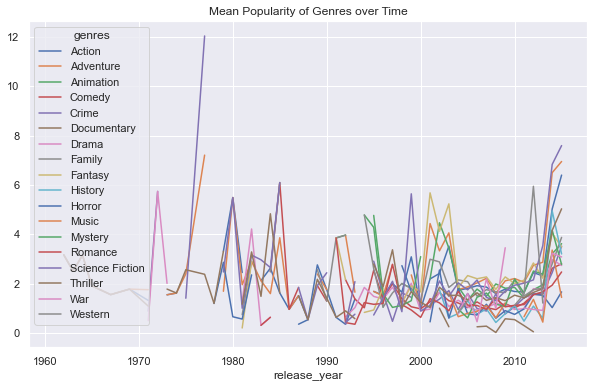

In [31]:
grouped_data = data.groupby(['release_year', 'genres'], as_index=False).mean()

# pivot the data to create a matrix of year vs. genre mean popularity
pivoted_data = grouped_data.pivot(index='release_year', columns='genres', values='popularity')

# plot the pivoted data
pivoted_data.plot(kind='line', figsize=(10,6), title='Mean Popularity of Genres over Time')

The above pivot table shows how the mean popularity of each genre changed over the years. Interestingly, in the 1970s, science fiction was by far the most popular genre, reaching the highest popularity score ever recorded of 12 from 1960 to 2015. 

However, over the years, as more novel genres like western and crime started gaining traction, the popularity of traditional genres like adventure, action and fantasy, though still remaining the few of the highest, dropped in popularity.

We went ahead to futher isolate the various genres, noting that the top 3 genres with the highest correlation to popularity is Adventure, Science Fiction and Action.

Text(0, 0.5, 'Popularity')

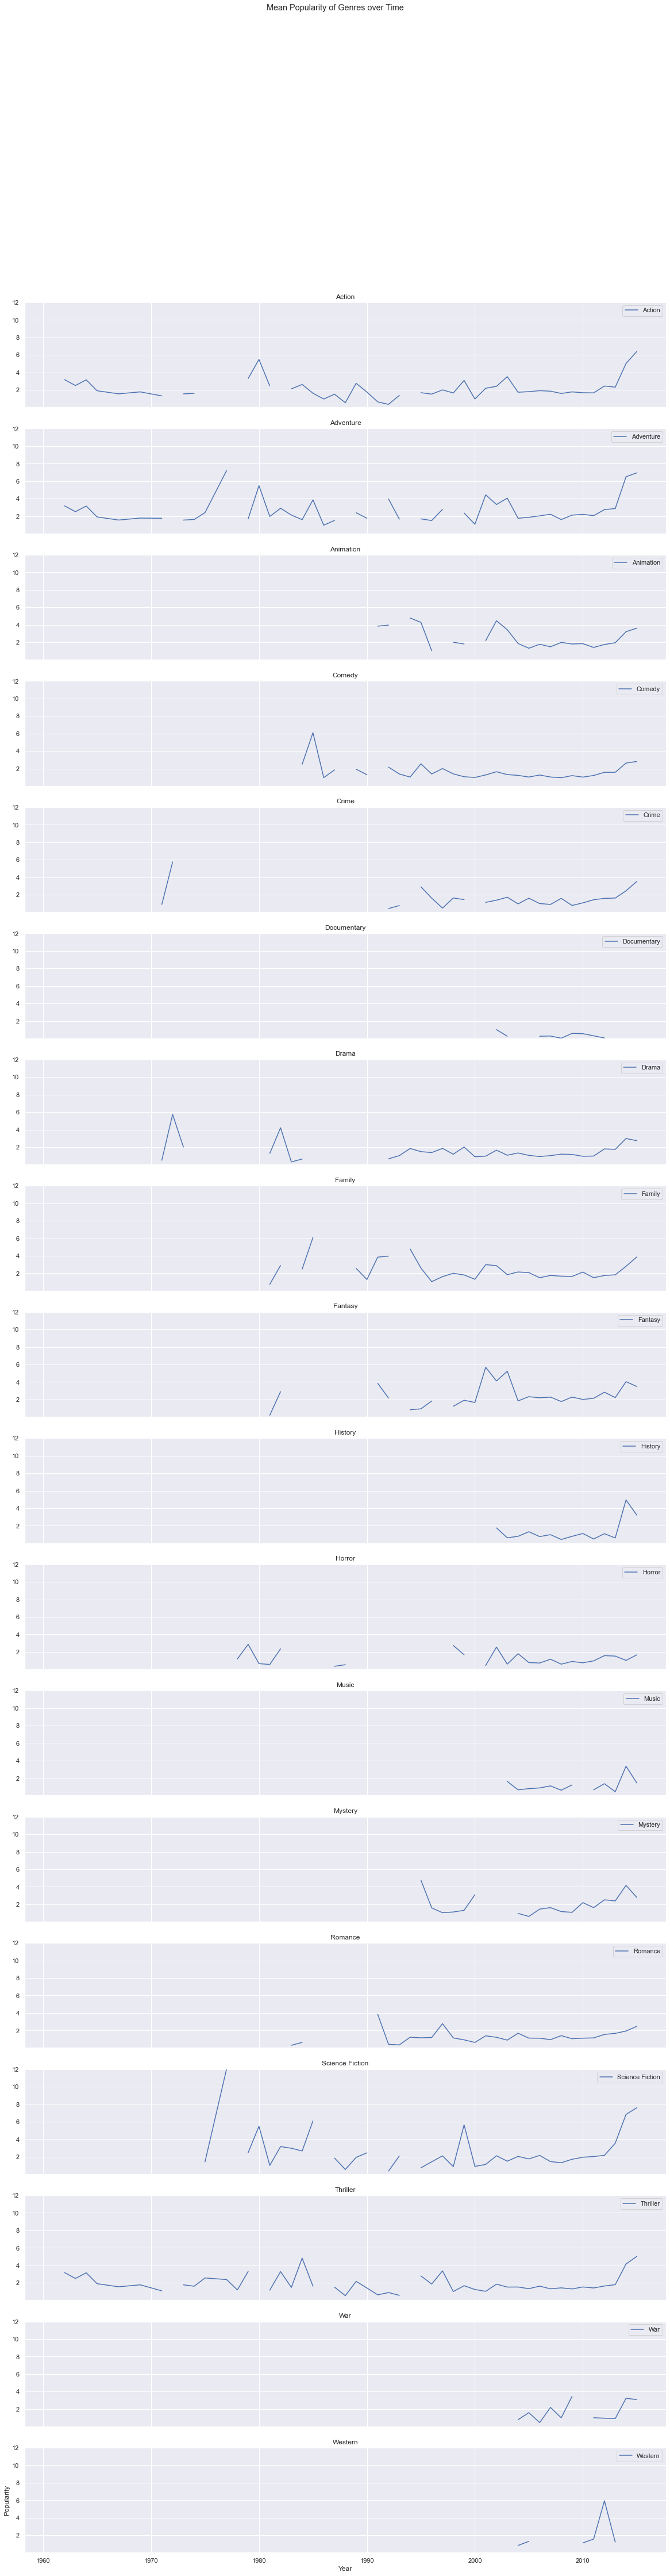

In [32]:
# create a separate subplot for each column
fig, axs = plt.subplots(nrows=len(pivoted_data.columns), figsize=(20, 4*len(pivoted_data.columns)), sharex=True)

# loop through each column and plot the data on the corresponding subplot
for i, col in enumerate(pivoted_data.columns):
    axs[i].plot(pivoted_data.index, pivoted_data[col], label=col)
    axs[i].legend()
    axs[i].set_title(col)

    #standardising the scale on the y axis
    axs[i].set_ylim([pivoted_data.min().min(), pivoted_data.max().max()])

# set the overall title and axis labels
fig.suptitle('Mean Popularity of Genres over Time')
plt.xlabel('Year')
plt.ylabel('Popularity')

### *profit*

<AxesSubplot:title={'center':'Mean Profit of Genres over Time'}, xlabel='release_year'>

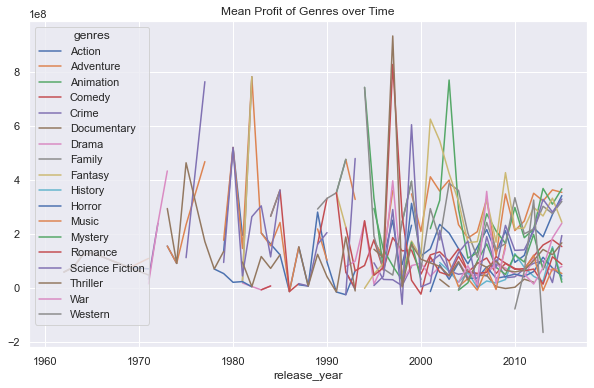

In [33]:
grouped_data1 = data.groupby(['release_year', 'genres'], as_index=False).mean()

# pivot the data to create a matrix of year vs. genre mean popularity
pivoted_data1 = grouped_data1.pivot(index='release_year', columns='genres', values='profit')

# plot the pivoted data
pivoted_data1.plot(kind='line', figsize=(10,6), title='Mean Profit of Genres over Time')

The above pivot graph showing the change in mean profit over time. Similar to that popularity and genres, over the years as more novel genres rose, there was not one genre that stood out significantly in profit gain from 2010 onwards.

Below is the isolated trends of the various genres. Note that the pivot graph has disjointed parts as there are years that no movies of that specific genre were produced. For example, it can be observed that movies with the genre “family” were not produced until the 1980s.


Text(0, 0.5, 'Profit')

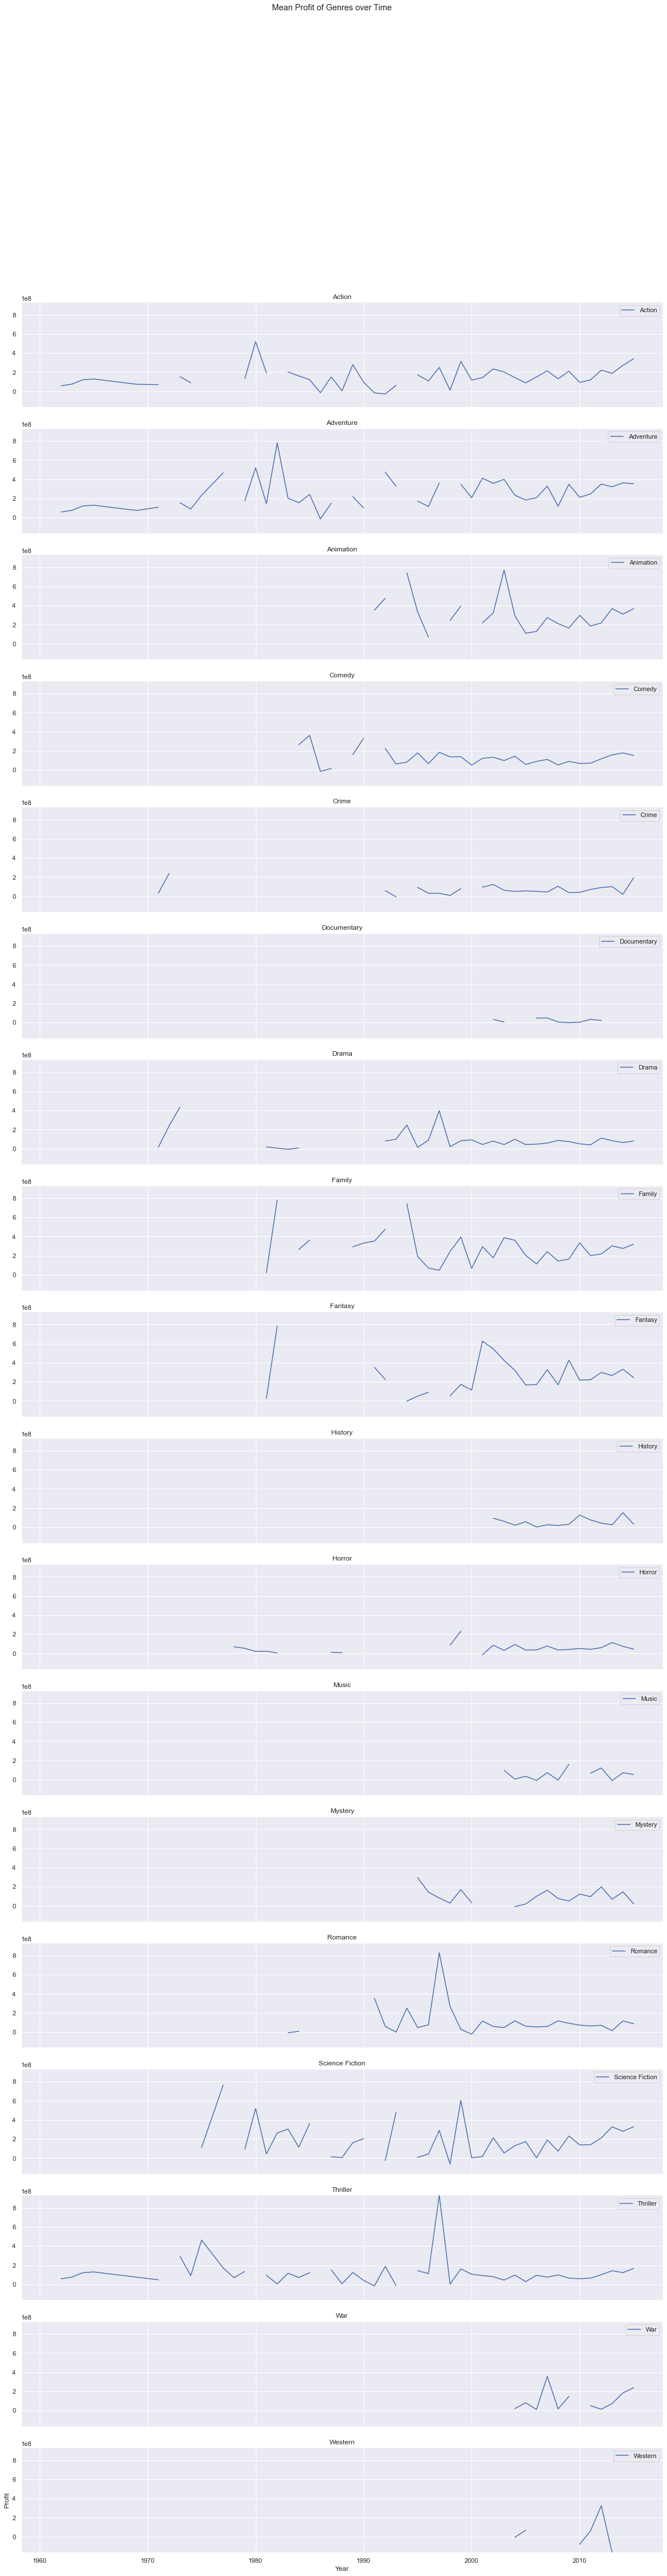

In [34]:
# create a separate subplot for each column
fig, axs = plt.subplots(nrows=len(pivoted_data1.columns), figsize=(20, 4*len(pivoted_data1.columns)), sharex=True)

# loop through each column and plot the data on the corresponding subplot
for i, col in enumerate(pivoted_data1.columns):
    axs[i].plot(pivoted_data1.index, pivoted_data1[col], label=col)
    axs[i].legend()
    axs[i].set_title(col)

    #standardising the scale on the y axis
    axs[i].set_ylim([pivoted_data1.min().min(), pivoted_data1.max().max()])

# set the overall title and axis labels
fig.suptitle('Mean Profit of Genres over Time')
plt.xlabel('Year')
plt.ylabel('Profit')

---
## Conclusion

From our deeper analysis, we can conclude that, for categorical dataset, genre plays the most important roles in determining the highest profit and popularity. More specifically, Adventure, Science Fiction and Action for popularity, and Adventure, Fantasy and Family for profit.

However, even though the correlation of most categorical factors are relatively low, it is important to keep in mind that high correlation does not equate to causation and likewise, low correlation does not mean that the determining factors does not affect the success factors. Therefore, it is still important to analyse factors that do not present a high correlation with the success factors.